In [1]:
from PIL import Image
from PIL import ImageOps
import numpy as np
import matplotlib.pyplot as plt
import cv2

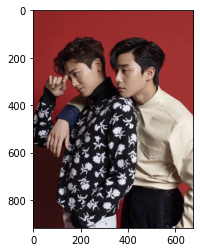

In [15]:
image = cv2.imread(r"C:\Users\Lenovo\OneDrive\Desktop\f56d42ed91044f4b2e13746e76f42139.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

Text(0.5, 1.0, 'Noisy Image')

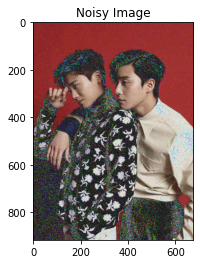

In [58]:
rows, cols,_= image.shape
noise = np.random.normal(0,15,(rows,cols,3)).astype(np.uint8)
noisy_image = image + noise
plt.imshow(noisy_image)
plt.title("Noisy Image")

Text(0.5, 1.0, 'Low pass filter bigger kernel')

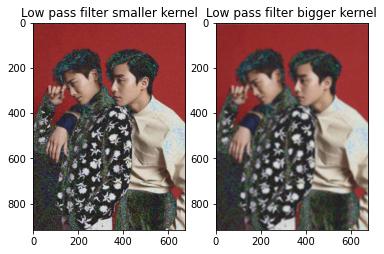

In [61]:
kernel1 = np.ones((3,3))/9

image_filtered1 = cv2.filter2D(src=noisy_image, ddepth=-1, kernel=kernel1)
plt.subplot(1, 2, 1)
plt.imshow(image_filtered1)                                      #smaller kernel gives sharper images
plt.title("Low pass filter smaller kernel")

kernel2 = np.ones((9,9))/81

image_filtered2 = cv2.filter2D(src=noisy_image, ddepth=-1, kernel=kernel2)
plt.subplot(1, 2, 2)
plt.imshow(image_filtered2)                                     #bigger kernels filter better but give blur outputs
plt.title("Low pass filter bigger kernel")

[[253 253 253 ... 251 251 251]
 [249 249 249 ... 250 250 250]
 [216 216 215 ... 214 214 214]
 ...
 [ 29  29  29 ... 166 164 161]
 [ 29  29  29 ... 169 166 164]
 [ 29  29  29 ... 170 168 166]]


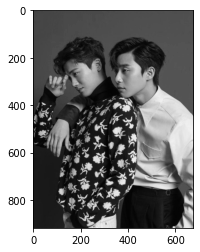

In [62]:
img_gray = cv2.imread(r"C:\Users\Lenovo\OneDrive\Desktop\f56d42ed91044f4b2e13746e76f42139.jpg", cv2.IMREAD_GRAYSCALE)
print(img_gray)
plt.imshow(img_gray ,cmap='gray')

Text(0.5, 1.0, 'Applied Gaussian Blur')

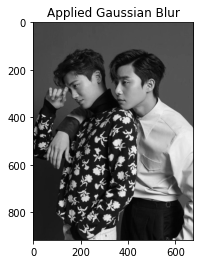

In [64]:
img_gray = cv2.GaussianBlur(img_gray,(3,3),sigmaX=0.1,sigmaY=0.1)
plt.imshow(img_gray ,cmap='gray')
plt.title("Applied Gaussian Blur")

Text(0.5, 1.0, 'y-direction sobel filter')

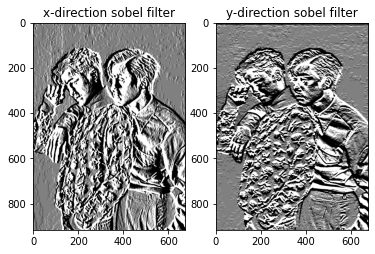

In [65]:
ddepth = cv2.CV_16S
grad_x = cv2.Sobel(src=img_gray, ddepth=ddepth, dx=1, dy=0, ksize=9)   
plt.subplot(1, 2, 1)
plt.imshow(grad_x,cmap='gray')
plt.title("x-direction sobel filter")

grad_y = cv2.Sobel(src=img_gray, ddepth=ddepth, dx=0, dy=1, ksize=9)
plt.subplot(1, 2, 2)
plt.imshow(grad_y,cmap='gray')
plt.title("y-direction sobel filter")

Text(0.5, 1.0, 'approximate gradient')

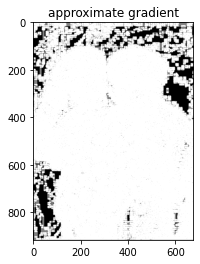

In [70]:
abs_grad_x = cv2.convertScaleAbs(grad_x)
abs_grad_y = cv2.convertScaleAbs(grad_y)

grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)
plt.figure()
plt.imshow(grad,cmap='gray')
plt.title("approximate gradient")

Text(0.5, 1.0, 'Median Blur')

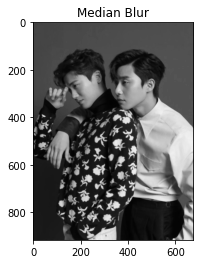

In [75]:
filtered_image = cv2.medianBlur(img_gray, 5)
plt.imshow(filtered_image,cmap="gray")
plt.title("Median Blur")